In [3]:
!where python

C:\Users\Sumanth\.conda\envs\iris-course\python.exe
C:\Users\Sumanth\AppData\Local\Programs\Python\Python313\python.exe
C:\Users\Sumanth\AppData\Local\Programs\Python\Python39\python.exe
C:\Users\Sumanth\AppData\Local\Microsoft\WindowsApps\python.exe


In [9]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [20]:
# For better visualization style
sns.set()

In [17]:
# 2. Load Dataset
df = pd.read_csv("Iris.csv")

In [21]:
# 3. Explore Dataset
print("First 5 rows of dataset:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())
print("\nClass Distribution:")
print(df['Species'].value_counts())

First 5 rows of dataset:
   SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None

Summary Statistics:
       SepalLengthCm  SepalWidth

In [22]:
# 4. Data Visualization
# Drop 'Id' if it exists
if 'Id' in df.columns:
    df_plot = df.drop('Id', axis=1)
else:
    df_plot = df

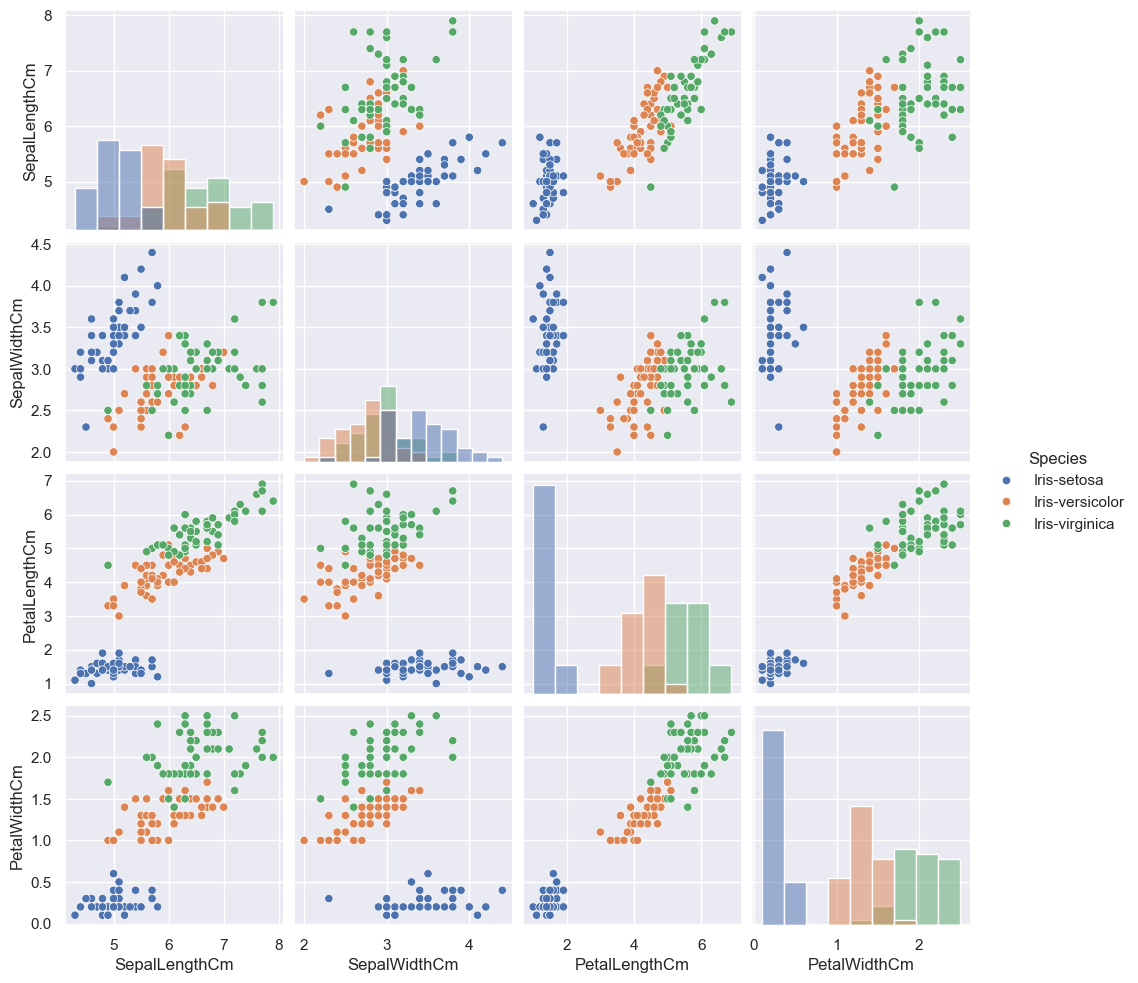

In [23]:
# Pairplot
sns.pairplot(df_plot, hue="Species", diag_kind="hist")
plt.show()

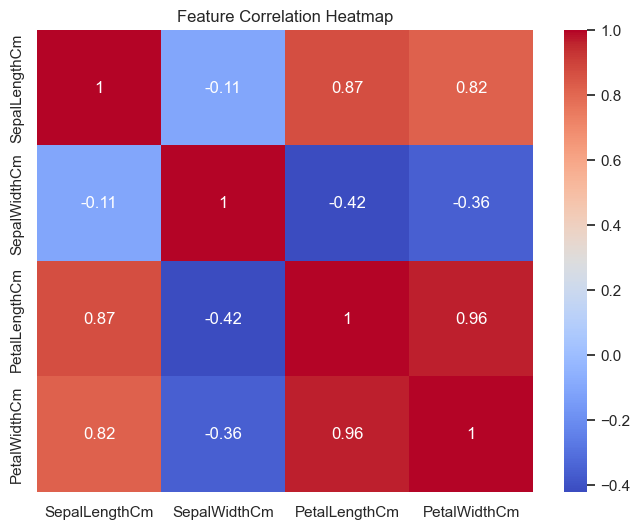

In [24]:
# Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_plot.drop('Species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [25]:
# 5. Data Preprocessing
X = df_plot.drop('Species', axis=1)  # Features
y = df_plot['Species']               # Target

In [26]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
# 6. Model Training & Evaluation
models = {
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200, random_state=42)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))


KNN Results:
Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Decision Tree Results:
Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30


Random Forest Results:
Accuracy: 1.0
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.

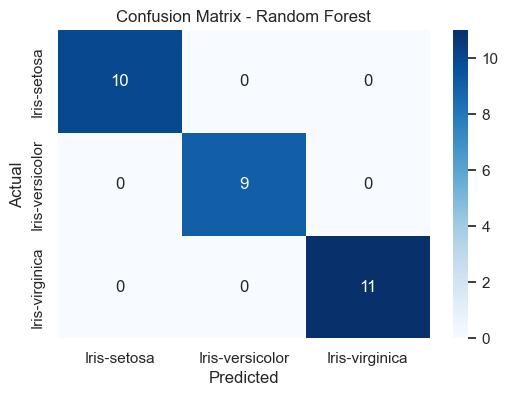

In [29]:
# 7. Confusion Matrix for Best Model (Example: Random Forest)
best_model = RandomForestClassifier(random_state=42)
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [30]:
# 8. Hyperparameter Tuning (Example: KNN)
param_grid = {'n_neighbors': np.arange(1, 21)}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("\nBest K for KNN:", grid.best_params_)
print("Best Score:", grid.best_score_)


Best K for KNN: {'n_neighbors': np.int64(3)}
Best Score: 0.95
